# **MLOps Group 5 Project Notebook - Ames Housing Data**

Group members: *Shadi Alfaraj, Yotaro Enomoto, Thomas Renwick, Massimo Tassinari, Tara Teylouni, Joy Zhong*

---

* [Part 0 - Importing the Necessary Libraries](#0)

* [Part 1 - Data Loading](#1)

* [Part 2 - Simple EDA + Pre-processing & Wrangling](#2)
  * [Part 2.1 - Dealing with Duplicates](#2.1)
  * [Part 2.2 - Exploring and Dealing with Outliers](#2.2)
  * [Part 2.3 - Dealing with Missing Data](#2.3)
    * [Part 2.3.1 - Dropping Columns with Many Missing Values](#2.3.1)
    * [Part 2.3.2 - Dealing with Columns which had <1% of Missing Values](#2.3.2)
    * [Part 2.3.3 - Dealing with the Remaining Columns](#2.3.3)
    * [Part 2.3.4 - Final Checks](#2.3.4)

* [Part 3 - Feature Engineering (Before Splitting)](#3)
  * [Part 3.1 - Dropping the PID Column](#3.1)
  * [Part 3.2 - Handling Special Categorical Cases](#3.2)
    * [Part 3.2.1 - Converting MSSubClass to Object](#3.2.1)

* [Part 4 - Dataset Preparation and Splitting](#4)
  * [Part 4.1 - Separating Features and Target](#4.1)
  * [Part 4.2 - Train-Test Split](#4.2)

* [Part 5 - Feature Preprocessing (Post Split)](#5)
  * [Part 5.1 - Identifying Categorical and Numerical Columns](#5.1)
  * [Part 5.2 - One-Hot Encoding Categorical Columns](#5.2)
  * [Part 5.3 - Scaling Numerical Columns](#5.3)
  * [Part 5.4 - Concatenating Encoded and Scaled Features](#5.4)

* [Part 6 - Model Training](#6)

* [Part 7 - Model Testing and Evaluation](#7)

* [Part 8 - Saving Trained Components](#8)

---

<a id='0'></a>
# Part 0 - Importing the Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

<a id='1'></a>
# Part 1 - Data Loading

In [2]:
df = pd.read_csv("../dataset/raw/Ames_Housing_Data.csv")

<a id='2'></a>
# Part 2 - Simple EDA + Pre-processing & Wrangling

<a id='2.1'></a>
## Part 2.1 - Dealing with Duplicates

We checked if there were any duplicate rows. We found there were no duplicate rows.

In [3]:
df.duplicated().any()

False

<a id='2.2'></a>
## Part 2.2 Exploring and Dealing with Outliers

In [4]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


We first explored the distribution of house prices across the dataset.

C:\Users\trtre\AppData\Local\Temp\ipykernel_5080\4143324588.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["SalePrice"])


<Axes: xlabel='SalePrice', ylabel='Density'>

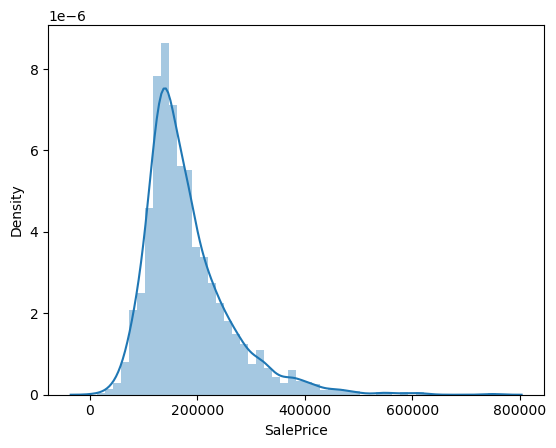

In [5]:
sns.distplot(df["SalePrice"])

Next, to be able to pinpoint outliers, we explored House Sale Price vs Overall Quality.

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

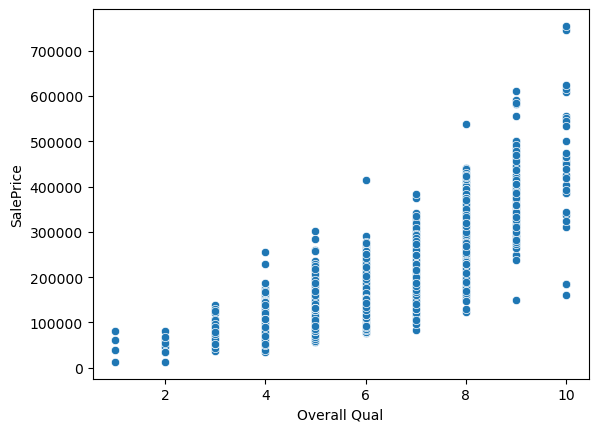

In [6]:
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df)

Given the trend of the data/graph (as well as our common sense and business context), we believed that those with Overall Quality > 8 and Sale Price < 200000 were most likely outliers.

We found only 4 observations had these characterisitcs.

In [7]:
df[(df['Overall Qual']>8) & (df['SalePrice']<200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Veenker,Norm,Norm,1Fam,2Story,9,3,1977,1977,Mansard,CompShg,Wd Sdng,Wd Sdng,BrkFace,1050.0,Gd,Gd,CBlock,Gd,TA,No,GLQ,410.0,Unf,0.0,584.0,994.0,GasA,TA,Y,SBrkr,1599,1345,0,2944,0.0,0.0,2,2,3,1,Gd,9,Typ,1,Gd,Attchd,1977.0,RFn,3.0,864.0,TA,TA,Y,140,70,16,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008.0,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260.0,Unf,0.0,878.0,3138.0,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1.0,0.0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3.0,884.0,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


Next, we continued to explore House Sale Price vs Gr Liv Area (i.e., living area in sqaure feet).

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

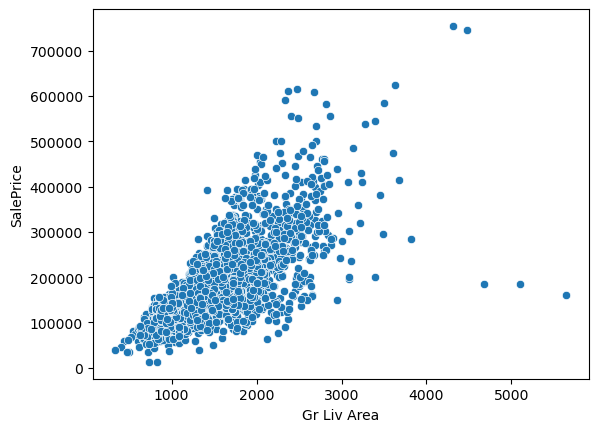

In [8]:
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df)

We believed that those houses with Gr Liv Area > 4000 and Sale Price < 400000 were most likely outliers as well.

We found 3 observations with those characteristics. All of them had the same index number (and therefore were the same observation) as those observations we also believed to be outliers in the Sale Price vs Overall Quality Analysis.

In [9]:
df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008.0,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260.0,Unf,0.0,878.0,3138.0,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1.0,0.0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3.0,884.0,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


Therefore, this confirmed our beliefs that these were outliers, hence we proceeded to drop them from our dataset.

1. First, we created a mask to find the index number of the outlier observations.

In [10]:
df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)].index

Index([1498, 2180, 2181], dtype='int64')

2. Then, we created a variable which stored these index numbers.

In [11]:
ind_drop = df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)].index

3. Finally, we used the `.drop()` method and the index number variable to drop the outliers from the dataset.

In [12]:
df = df.drop(ind_drop,axis=0)

Before continuing with the EDA and data wrangling, we made some final checks to make sure these outliers had been dropped correctly.

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

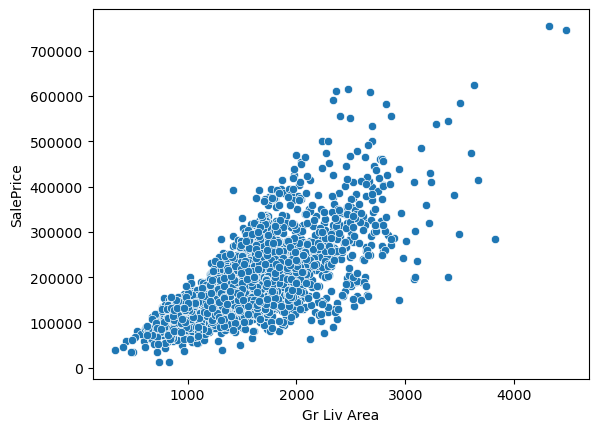

In [13]:
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df)

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

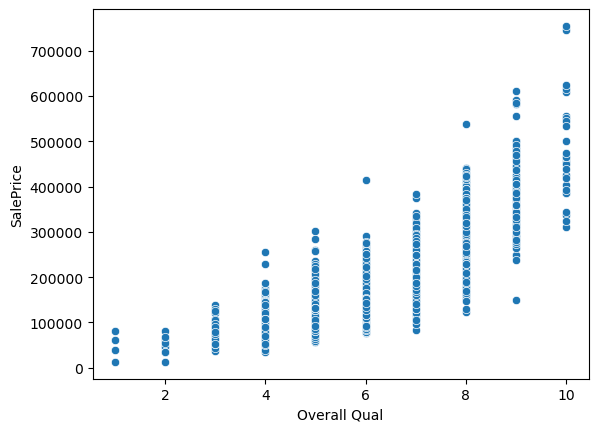

In [14]:
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df)

<a id='2.3'></a>
## Part 2.3 - Dealing with Missing Data

Next, we proceeded to explore/discover and deal with missing data values.

In [15]:
len(df.columns)

81

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2927 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2927 non-null   int64  
 1   MS SubClass      2927 non-null   int64  
 2   MS Zoning        2927 non-null   object 
 3   Lot Frontage     2437 non-null   float64
 4   Lot Area         2927 non-null   int64  
 5   Street           2927 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2927 non-null   object 
 8   Land Contour     2927 non-null   object 
 9   Utilities        2927 non-null   object 
 10  Lot Config       2927 non-null   object 
 11  Land Slope       2927 non-null   object 
 12  Neighborhood     2927 non-null   object 
 13  Condition 1      2927 non-null   object 
 14  Condition 2      2927 non-null   object 
 15  Bldg Type        2927 non-null   object 
 16  House Style      2927 non-null   object 
 17  Overall Qual     29

In [17]:
df.isnull()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

We checked how many missing values each column had.

In [18]:
df.isnull().sum()

PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 81, dtype: int64

Then, we checked how much percentage of missing values each column had relative to the total number of observations.

In [19]:
100* df.isnull().sum() / len(df)

PID                0.00000
MS SubClass        0.00000
MS Zoning          0.00000
Lot Frontage      16.74069
Lot Area           0.00000
                    ...   
Mo Sold            0.00000
Yr Sold            0.00000
Sale Type          0.00000
Sale Condition     0.00000
SalePrice          0.00000
Length: 81, dtype: float64

We created a function which only returns  columns with missing values (as a percentage relative to the total number of observations).

In [20]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [21]:
percent_nan = percent_missing(df)

We then plotted this function to have a visual reference of how many missing values each column had (relative to the total number of observations), to then be able to deal with each of these accordingly.

C:\Users\trtre\AppData\Local\Temp\ipykernel_5080\2144311172.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percent_nan.index,y=percent_nan, palette='pastel')


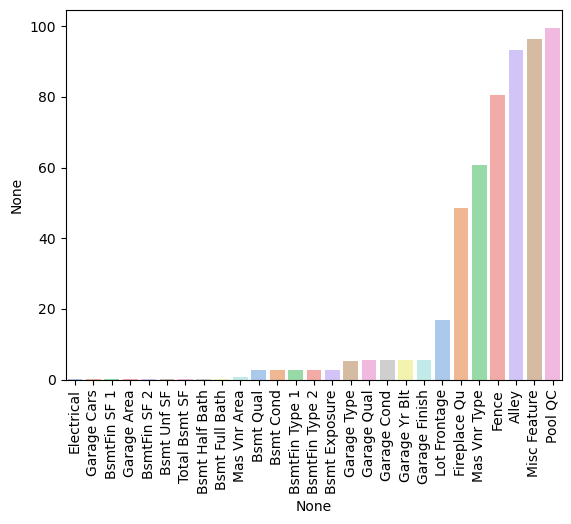

In [22]:
sns.barplot(x=percent_nan.index,y=percent_nan, palette='pastel')
plt.xticks(rotation=90);

<a id='2.3.1'></a>
### Part 2.3.1 - Dropping Columns with Many Missing Values

First we began dealing with the columns which had a very high percentage of missing values (>80%), as these could not be used for predictive purposes. Given that they could not be used for predictive purposes we decided to drop them.

In [23]:
df = df.drop(['Pool QC','Misc Feature','Alley','Fence'],axis=1)

In [24]:
percent_nan = percent_missing(df)

C:\Users\trtre\AppData\Local\Temp\ipykernel_5080\2144311172.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percent_nan.index,y=percent_nan, palette='pastel')


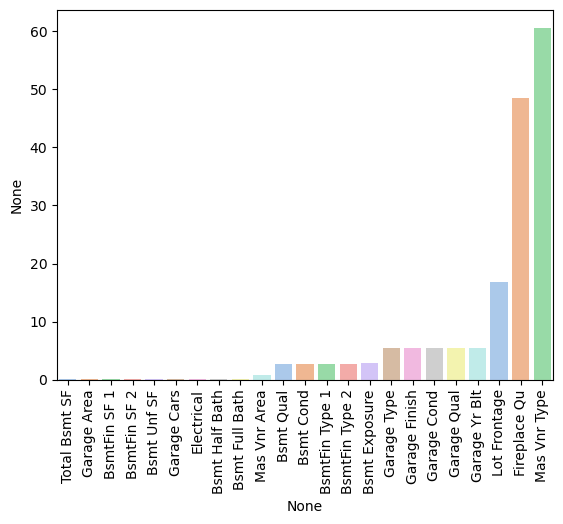

In [25]:
sns.barplot(x=percent_nan.index,y=percent_nan, palette='pastel')
plt.xticks(rotation=90);

<a id='2.3.2'></a>
### Part 2.3.2 - Dealing with Columns which had <1% of Missing Values

For those columns which had <1% of missing values, we opted for different strategies depending on how much additional information we had available for each variable/feature (as well as business context).

C:\Users\trtre\AppData\Local\Temp\ipykernel_5080\2473218133.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percent_nan.index,y=percent_nan,palette='pastel')


(0.0, 1.0)

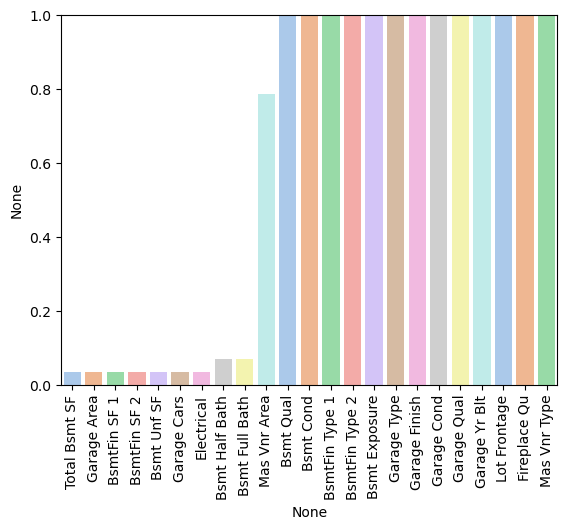

In [26]:
sns.barplot(x=percent_nan.index,y=percent_nan,palette='pastel')
plt.xticks(rotation=90);

# Set 1% Threshold
plt.ylim(0,1)

In [27]:
percent_nan[percent_nan < 1]

Total Bsmt SF     0.034165
Garage Area       0.034165
BsmtFin SF 1      0.034165
BsmtFin SF 2      0.034165
Bsmt Unf SF       0.034165
Garage Cars       0.034165
Electrical        0.034165
Bsmt Half Bath    0.068329
Bsmt Full Bath    0.068329
Mas Vnr Area      0.785787
dtype: float64

In [28]:
100/len(df)

0.0341646737273659

#### Basement Columns:

For basement columns with missing data, we filled in the missing values with the additional information (from the dataset description document) we had available for these columns (shown below).

In [29]:
df[df['Total Bsmt SF'].isnull()]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,903230120,20,RM,99.0,5940,Pave,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,NaN,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,0,4,2008,ConLD,Abnorml,79000


In [30]:
df[df['Bsmt Half Bath'].isnull()]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,903230120,20,RM,99.0,5940,Pave,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,NaN,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,0,4,2008,ConLD,Abnorml,79000
1497,908154080,20,RL,123.0,47007,Pave,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,NaN,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,0,7,2008,WD,Normal,284700


We filled in data based on column names. There are 2 types of basement features, numerical and string descriptives.


The numerical basement columns:

In [31]:
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

The string basement columns:

In [32]:
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

#### Electrical and Garage Cars Columns:

For the Electrical and Garage Cars columns, given that we did not have any additional information on these, we proceeded to drop them. This missing data only represented 0.03% of the whole dataset, which was not an amount of data we believed to be significant to our analysis if dropped.

In [33]:
df = df.dropna(axis=0,subset= ['Electrical','Garage Cars'])

#### Mas Vnr Columns:

To deal with missing values for the Mas Vnr features/columns we used additional information we had available from the datseta description document.

Based on the Description Text File, Mas Vnr Type and Mas Vnr Area being missing (NaN) was likely to mean the house simply just didn't have a masonry veneer. Therfore, we proceeded to fill in this data as we did before.

In [34]:
df["Mas Vnr Type"] = df["Mas Vnr Type"].fillna("None")
df["Mas Vnr Area"] = df["Mas Vnr Area"].fillna(0)

#### Checks:

We checked the missing data once more before proceeding.

In [35]:
percent_nan = percent_missing(df)

C:\Users\trtre\AppData\Local\Temp\ipykernel_5080\4228072929.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percent_nan.index,y=percent_nan,palette='pastel')


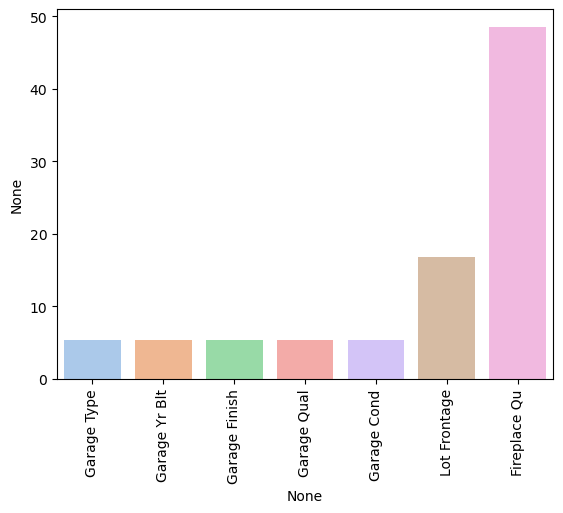

In [36]:
sns.barplot(x=percent_nan.index,y=percent_nan,palette='pastel')
plt.xticks(rotation=90);

<a id='2.3.3'></a>
### Part 2.3.3 - Dealing with the Remaining Columns

Our previous approaches were based more on rows missing data, next we proceeded to take an approach based on the column features themselves, since larger percentages of the data were missing (but not so much so that it was necessary to drop the entire column).

#### Garage Columns:

Based on the dataset description, these NaN values seemed to indicate no garage, therefore we substituted with "None" or 0.

In [37]:
df[['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']]

,Garage Type,Garage Finish,Garage Qual,Garage Cond
0,Attchd,Fin,TA,TA
1,Attchd,Unf,TA,TA
2,Attchd,Unf,TA,TA
3,Attchd,Fin,TA,TA
4,Attchd,Fin,TA,TA
...,...,...,...,...
2925,Detchd,Unf,TA,TA
2926,Attchd,Unf,TA,TA
2927,NaN,NaN,NaN,NaN
2928,Attchd,RFn,TA,TA


In [38]:
gar_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df[gar_str_cols] = df[gar_str_cols].fillna('None')

In [39]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

We then checked whether we had dealt with the missing values for these Garage columns correctly.

In [40]:
percent_nan = percent_missing(df)

C:\Users\trtre\AppData\Local\Temp\ipykernel_5080\4228072929.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percent_nan.index,y=percent_nan,palette='pastel')


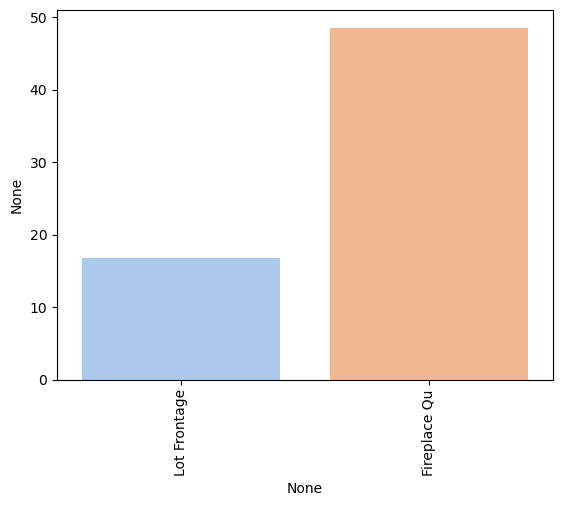

In [41]:
sns.barplot(x=percent_nan.index,y=percent_nan,palette='pastel')
plt.xticks(rotation=90);

#### Fireplace Quality Column:

Next, we also filled in the Fireplace Quality column based on the dataset description document.

In [42]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna("None")

We also checked whether we had dealt with the missing values correctly for this Fireplace Quality Column.

In [43]:
percent_nan = percent_missing(df)

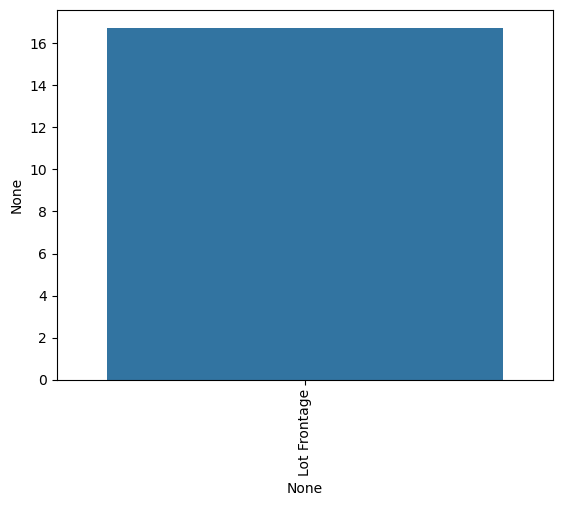

In [44]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

#### Lot Frontage Column:

The last column which still had missing data values which we had to deal with was the Lot Frontage column. For this column we imputed the data using the neighbourhood mean Lot Frontage value, operating under the assumption that the Lot Frontage is related to what neighborhood a house is in. The Lot Frontage is the linear feet of street connected to a property.

In [45]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

We then checked to make sure that we had no more null values, however there were still a few remaining.

In [46]:
percent_nan = percent_missing(df)

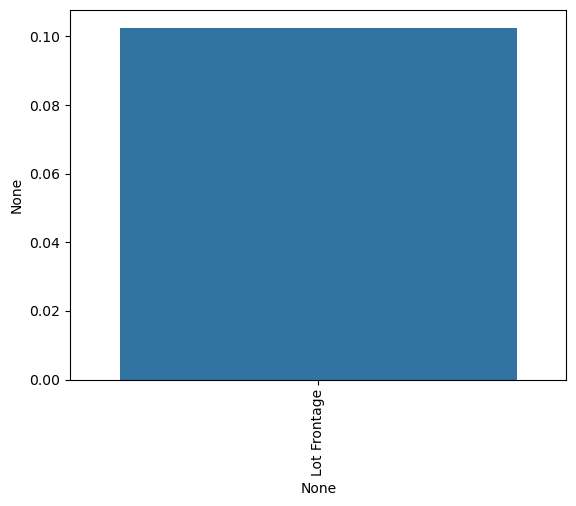

In [47]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

For those observations where there were no Lot Frontage values for the entire neighbourhood, we filled those with 0's assuming that those properties did not have a linear feet of street connected to them (i.e., these properties did not have a Lot).

In [48]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

<a id='2.3.4'></a>
### Part 2.3.4 - Final Checks

We made some final checks to ensure we had no more missing values left, such that we could proceed with the feature engineering part of our project.

In [49]:
percent_nan = percent_missing(df)

In [50]:
percent_nan

Series([], dtype: float64)

In [51]:
df.isna().sum().sum()

0

In [52]:
#df.to_csv("Ames_NO_Missing_Data.csv",index=False)

<a id='3'></a>
# Part 3 - Feature Engineering (Before Splitting)

<a id='3.1'></a>
## Part 3.1 - Dropping the PID Column

An index/PID unique identifier column did not add any value for our predictive analysis (i.e., it can't be used for machine learning), therefore we decided to drop it.

In [53]:
df = df.drop('PID',axis=1)

In [54]:
len(df.columns)

76

<a id='3.2'></a>
## Part 3.2 - Handling Special Categorical Cases

<a id='3.2.1'></a>
### Part 3.2.1 - Converting MSSubClass to Object

Before splitting the dataset into training and testing sets or separating the columns into object and numerical ones, it was necessary to convert the values of the column MSSubClass into strings, as the values of this column represent a number code per class.

    MSSubClass: Identifies the type of dwelling involved in the sale.

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

The number itself does not appear to have a relationship to the other numbers. While 30 > 20 is True, it doesn't really make sense that "1-STORY 1945 & OLDER" > "1-STORY 1946 & NEWER ALL STYLES".

In [55]:
# Convert to String
df['MS SubClass'] = df['MS SubClass'].apply(str)

<a id='4'></a>
# Part 4 - Dataset Preparation and Splitting

<a id='4.1'></a>
## Part 4.1 - Separating Features and Target

In [56]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

<a id='4.2'></a>
## Part 4.2 - Train-Test Split

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<a id='5'></a>
# Part 5 - Feature Preprocessing (Post Split)

<a id='5.1'></a>
## Part 5.1 - Identifying Categorical and Numerical Columns

In [58]:
df_objs = X_train.select_dtypes(include='object').columns
df_nums = X_train.select_dtypes(exclude='object').columns

In [59]:
df_objs

Index(['MS SubClass', 'MS Zoning', 'Street', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Sale Type', 'Sale Condition'],
      dtype='object')

In [60]:
df_nums

Index(['Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1',
       'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt',
       'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF',
       'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val',
       'Mo Sold', 'Yr Sold'],
      dtype='object')

<a id='5.2'></a>
## Part 5.2 - One-Hot Encoding Categorical Columns

In [61]:
from sklearn.preprocessing import OneHotEncoder

# Drop the first category of each feature to avoid multicollinearity
ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
X_train_cat = ohe.fit_transform(X_train[df_objs])
X_test_cat = ohe.transform(X_test[df_objs])

c:\Users\trtre\anaconda3\envs\thomas_env\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 10, 15, 16, 30] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


<a id='5.3'></a>
## Part 5.3 - Scaling Numerical Columns

In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train[df_nums])
X_test_num = scaler.transform(X_test[df_nums])

<a id='5.4'></a>
## Part 5.4 - Concatenating Encoded and Scaled Features

In [63]:
X_train_final = np.hstack([X_train_num, X_train_cat])
X_test_final = np.hstack([X_test_num, X_test_cat])

<a id='6'></a>
# Part 6 - Model Training

In [64]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_final, y_train)

LinearRegression()

<a id='7'></a>
# Part 7 - Model Testing and Evaluation

In [65]:
test_predictions = model.predict(X_test_final)

In [66]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [67]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [68]:
MAE

14153.022299374143

In [69]:
MSE

443450691.18106395

In [70]:
RMSE

21058.268950250018

In [71]:
np.mean(df['SalePrice'])

180815.53743589742

<a id='8'></a>
# Part 8 - Saving Trained Components

In [ ]:
#joblib.dump(ohe, 'encoder.pkl')
#joblib.dump(scaler, 'scaler.pkl')
#joblib.dump(model, 'linear_model.pkl')

----